### EDA

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, date, time, timedelta
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
#importing over and undersampling algorithms from imblearn (you will have to manually install it in your envoirenment with pip install imblearn) 
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [52]:
data = pd.read_csv('./data/training.csv')


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [5]:
data.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [7]:
sns.pairplot(data)

In [8]:
plotting the correlation matrix on the given data to see how each column correlates to another
fraud_data = data.drop(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'CountryCode'], axis = 1)
plt.figure(figsize=(10, 10))
matrix = np.triu(fraud_data.corr())
sns.heatmap(fraud_data.corr(), annot=True,
            linewidth=.8, mask=matrix, cmap="viridis");

In [54]:
#Convert time to datatime format
data['TransactionStartTime'] = pd.to_datetime(data['TransactionStartTime'], format='%Y-%m-%dT%H:%M:%SZ')
data['Hour'] = data['TransactionStartTime'].dt.hour


In [55]:
#Creating a new variable
data.loc[data['Amount'] >= 0, 'DirectionOfMoney'] = 1
data.loc[data['Amount'] < 0, 'DirectionOfMoney'] = 0


In [56]:
#Creating the final dataset
cat_var = ['PricingStrategy', 'ProviderId', 'ProductId', 'ChannelId', 'ProductCategory', 'Hour', 'DirectionOfMoney']
con_variables = ['Value']
features_cat = pd.get_dummies(data[cat_var])
features_cat
df = data[con_variables].merge(features_cat, left_index=True, right_index=True, how='inner')


In [12]:
#defining X and y
X = df
y = data['FraudResult']

/Users/corneliusbohle/.pyenv/versions/3.9.4/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/corneliusbohle/.pyenv/versions/3.9.4/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/corneliusbohle/.pyenv/versions/3.9.4/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will re

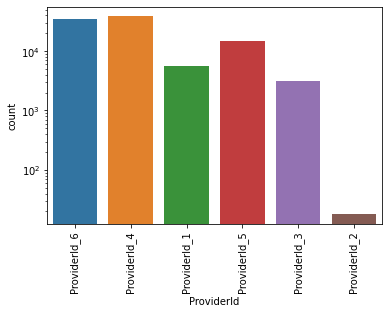

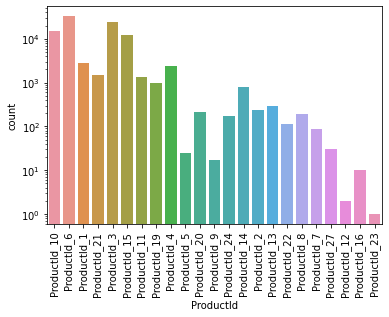

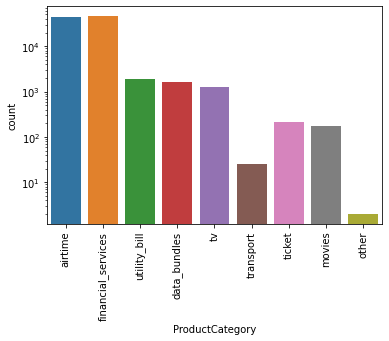

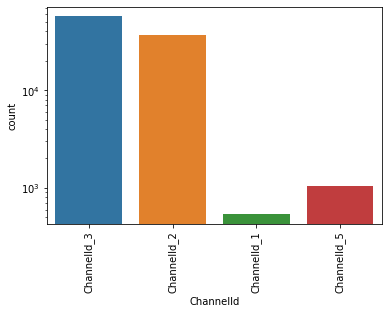

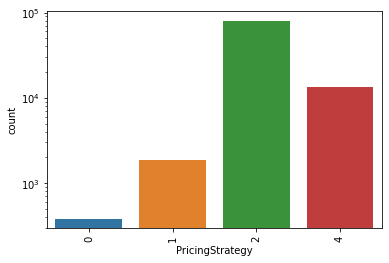

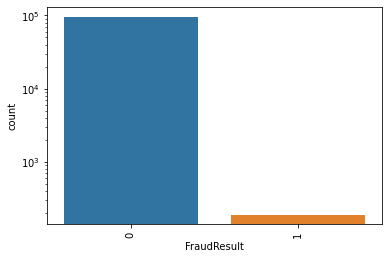

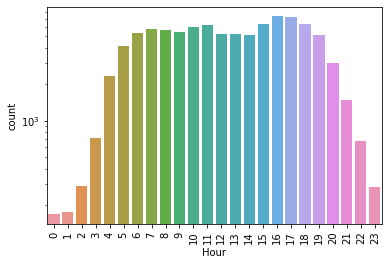

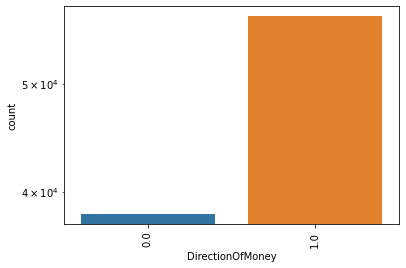

In [14]:
# univariate distributions
for c in data[['ProviderId', 'ProductId','ProductCategory', 'ChannelId','PricingStrategy', 'FraudResult', 'Hour','DirectionOfMoney']].columns:
        plt.figure()
        sns.countplot(data[c])
        plt.xticks(rotation=90)
        plt.yscale('log')


#sns.countplot(data[''])

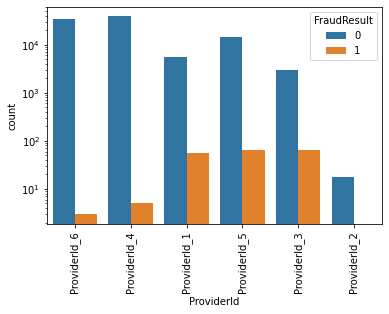

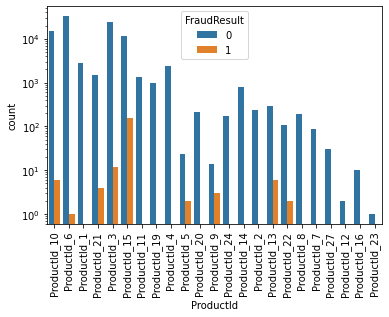

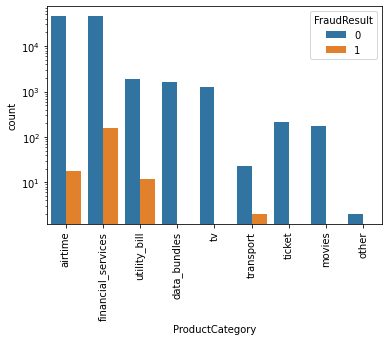

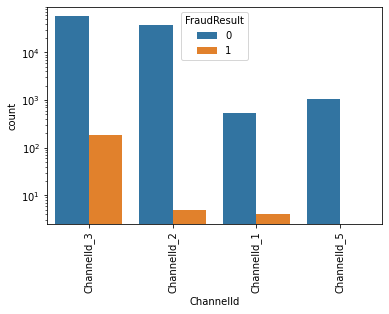

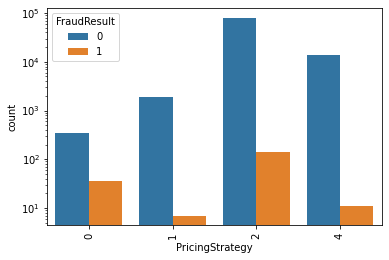

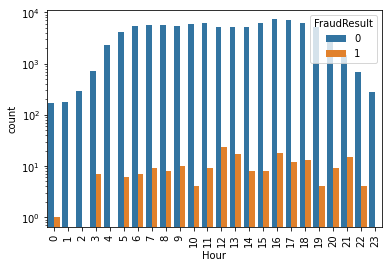

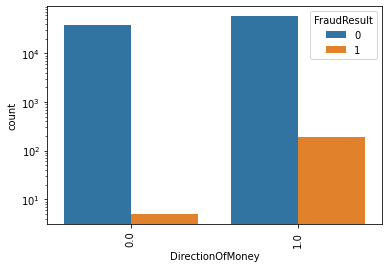

In [16]:
# bivartiate distrobution
for c in data[['ProviderId', 'ProductId','ProductCategory', 'ChannelId','PricingStrategy', 'Hour','DirectionOfMoney']].columns:
        plt.figure()
        #g = sns.FacetGrid(data = data,  col = 'FraudResult')
        sns.countplot(x=c, hue='FraudResult', data = data)
        #g.map(sns.countplot, x = c)
        plt.xticks(rotation=90)
        plt.yscale('log')

#g = sns.FacetGrid(data[['ProviderId', 'ProductId','ProductCategory', 'ChannelId','PricingStrategy', 'FraudResult', 'Hour','DirectionOfMoney', 'FraudResult']], 
#'FraudResult')
#g.map(sns.catplot, 


In [58]:
# creating new column for the log of value (to erase outliers)
df['Valuelog'] = np.log(df['Value'])

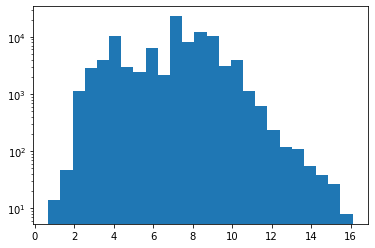

In [64]:
plt.hist(df['Valuelog'], bins=25)
plt.yscale('log')

In [46]:
# initialising first very simple basline model, every transaction used for financial services is predicte to be fradulent
#used the great method kat showed us
df.loc[df['ProductCategory_financial_services'] == 1, 'Prediction'] = 1
df.loc[df['ProductCategory_financial_services'] != 1, 'Prediction'] = 0
predictions = df.Prediction
df = df.drop('Prediction', axis=1)

In [21]:
#printing scores for baseline
print(accuracy_score(y, predictions))
print(precision_score(y, predictions))
print(recall_score(y, predictions))
print(f1_score(y, predictions))

0.5267086199326796
0.003545864992842198
0.8341968911917098
0.007061713233036537


In [22]:
#defining X and y
X = df
y = data['FraudResult']

In [35]:
#splitting data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [47]:
#used smote algorithm (synthetic oversampling) to oversample fradulent class
# dataframes of synthetic datapoints: smote_data_X, smote_data_Y
smote_algo = SMOTE(random_state=50)
smote_data_X, smote_data_Y = smote_algo.fit_resample(X_train, y_train)
smote_data_X = pd.DataFrame(data=smote_data_X, columns=X_train.columns)
smote_data_Y = pd.DataFrame(data=smote_data_Y, columns=['FraudResult'])

In [49]:
# used randomundersampler algorithm to undersample non fradulent class
# dataframes for undersampled data: X_res, y_res
rus = RandomUnderSampler(random_state=50)
X_res, y_res = rus.fit_resample(X_train, y_train)